In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# 시카고의 안전을 위해

최근 10년간의 데이터를 분석, 보완할 부분을 파악한다.

community_area 참고: https://en.wikipedia.org/wiki/File:Map_of_the_Community_Areas_and_%27Sides%27_of_the_City_of_Chicago.svg</br>
https://home.chicagopolice.org/community-policing-group/community-map/

In [6]:
query_string = """
SELECT unique_key,
        date,
        primary_type,
        location_description,
        arrest,
        domestic,
        beat,
        community_area
FROM `bigquery-public-data.chicago_crime.crime`
where year between 2012 and 2021
order by date ;
"""

df = client.query(query_string).to_dataframe()
df.head()

,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0
4,8421988,2012-01-01 01:00:00+00:00,BATTERY,PARK PROPERTY,True,True,1123,27.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2670253 entries, 0 to 2670252
Data columns (total 8 columns):
 #   Column                Dtype              
---  ------                -----              
 0   unique_key            int64              
 1   date                  datetime64[ns, UTC]
 2   primary_type          object             
 3   location_description  object             
 4   arrest                bool               
 5   domestic              bool               
 6   beat                  int64              
 7   community_area        float64            
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int64(2), object(2)
memory usage: 127.3+ MB


In [44]:
# 결측치 제거
df.isna().sum()

unique_key                 0
date                       0
primary_type               0
location_description    8442
arrest                     0
domestic                   0
beat                       0
community_area            32
dtype: int64

In [179]:
df = df.dropna()
df

,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0
4,8421988,2012-01-01 01:00:00+00:00,BATTERY,PARK PROPERTY,True,True,1123,27.0
...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0


In [180]:
# 가정 관련 범죄는 제외
df1 = df.loc[df['domestic'] == False]
df1

,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0
5,9049473,2012-01-01 01:00:00+00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,332,43.0
...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0


In [181]:
# 년, 월 별도 설정
df1['month'] = df1['date'].dt.strftime('%Y-%m')
df1['year'] = df1['date'].dt.strftime('%Y')
df1

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/2014687281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['date'].dt.strftime('%Y-%m')
/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/2014687281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['date'].dt.strftime('%Y')


,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area,month,year
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0,2012-01,2012
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0,2012-01,2012
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0,2012-01,2012
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0,2012-01,2012
5,9049473,2012-01-01 01:00:00+00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,332,43.0,2012-01,2012
...,...,...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0,2021-12,2021
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0,2021-12,2021
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0,2021-12,2021
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0,2021-12,2021


In [407]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227518 entries, 0 to 2670252
Data columns (total 11 columns):
 #   Column                Dtype              
---  ------                -----              
 0   unique_key            int64              
 1   date                  datetime64[ns, UTC]
 2   primary_type          object             
 3   location_description  object             
 4   arrest                bool               
 5   domestic              bool               
 6   beat                  int64              
 7   community_area        float64            
 8   month                 object             
 9   year                  object             
 10  only_month            object             
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 174.2+ MB


In [182]:
# 년도별 분석
df1_year = df1['year'].value_counts().reset_index().sort_values('index')
df1_year

,index,year
0,2012,287084
1,2013,262175
2,2014,234695
6,2015,222138
3,2016,225203
4,2017,224797
5,2018,223487
7,2019,216498
8,2020,170493
9,2021,160948


In [183]:
df1_year.columns = ['year', 'count']
df1_year

,year,count
0,2012,287084
1,2013,262175
2,2014,234695
6,2015,222138
3,2016,225203
4,2017,224797
5,2018,223487
7,2019,216498
8,2020,170493
9,2021,160948


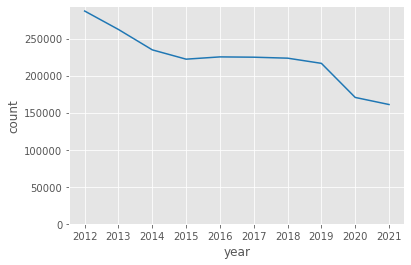

In [385]:
sns.lineplot(data = df1_year, x = 'year', y = 'count', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.show()

In [488]:
(170493 - 216498) / 216498 *100

-21.249618934124104

- 2019~20: 약 -21%

In [186]:
# 년+월별 분석
df1_month = df1['month'].value_counts().reset_index().sort_values('index')
df1_month

,index,month
15,2012-01,22478
35,2012-02,20366
7,2012-03,24209
10,2012-04,23158
3,2012-05,25500
...,...,...
106,2021-08,14198
98,2021-09,15133
96,2021-10,15394
107,2021-11,13792


In [187]:
df1_month.columns = ['month', 'count']
df1_month

,month,count
15,2012-01,22478
35,2012-02,20366
7,2012-03,24209
10,2012-04,23158
3,2012-05,25500
...,...,...
106,2021-08,14198
98,2021-09,15133
96,2021-10,15394
107,2021-11,13792


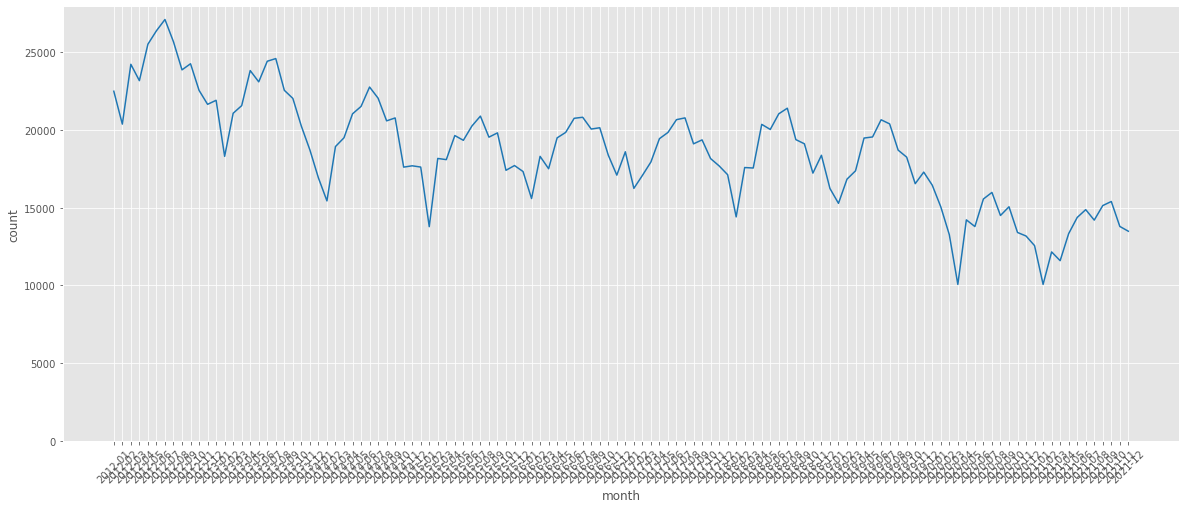

In [395]:
plt.figure(figsize = (20,8))
sns.lineplot(data = df1_month, x = 'month', y = 'count', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.xticks(rotation = 45)
plt.show()

특정 월에 범죄가 급감하고 다시 올라간다

In [189]:
df1['only_month'] = df1['date'].dt.strftime('%m')
df1

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/875801696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['only_month'] = df1['date'].dt.strftime('%m')


,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area,month,year,only_month
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0,2012-01,2012,01
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0,2012-01,2012,01
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0,2012-01,2012,01
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0,2012-01,2012,01
5,9049473,2012-01-01 01:00:00+00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,332,43.0,2012-01,2012,01
...,...,...,...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0,2021-12,2021,12
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0,2021-12,2021,12
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0,2021-12,2021,12
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0,2021-12,2021,12


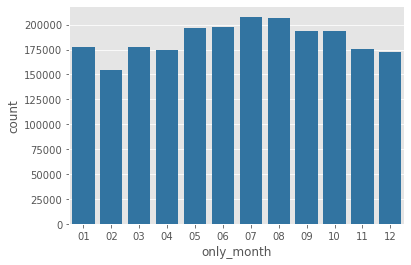

In [190]:
sns.countplot(data = df1, x = 'only_month', color = 'tab:blue')
plt.show()

- 2월이 상대적으로 범죄 발생 수가 적음
- 여름(7,8월) 상대적으로 범죄 발생 수가 많음

## 체포율

In [408]:
df1['arrest'].value_counts() / 2227518

False    0.76432
True     0.23568
Name: arrest, dtype: float64

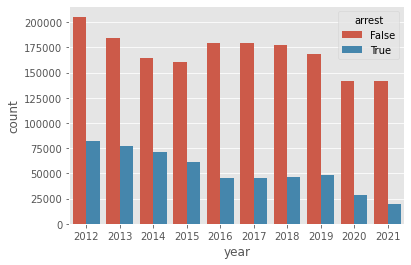

In [409]:
sns.countplot(data = df1, x = 'year', hue = 'arrest')
plt.show()

In [410]:
df1_arrest = pd.DataFrame(df1.groupby('year')['arrest'].value_counts())
df1_arrest.columns = ['count']
df1_arrest = df1_arrest.reset_index()
df1_arrest

,year,arrest,count
0,2012,False,205392
1,2012,True,81692
2,2013,False,184617
3,2013,True,77558
4,2014,False,163966
5,2014,True,70729
6,2015,False,160791
7,2015,True,61347
8,2016,False,179712
9,2016,True,45491


In [411]:
df1_arrest['year'] = df1_arrest['year'].astype('int32')
df1_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20 non-null     int32
 1   arrest  20 non-null     bool 
 2   count   20 non-null     int64
dtypes: bool(1), int32(1), int64(1)
memory usage: 388.0 bytes


In [413]:
# 년도별 체포율 구하여 새 데이터프레임에 저장
def arrest_ratio(year, dataframe1, dataframe2):
    i = 0
    while year < 2022:
        temp = dataframe1.loc[dataframe1['year'] == year]
        ratio = temp.loc[temp['arrest'] == True, 'count'] / temp['count'].sum() * 100
        ratio = ratio.values[0]
        dataframe2.loc[i] = [year, round(ratio, 2)]
        i = i + 1
        year = year + 1

In [412]:
df1_arrest_ratio = pd.DataFrame(columns = ['year', 'ratio'])
df1_arrest_ratio

,year,ratio


In [414]:
arrest_ratio(2012, df1_arrest, df1_arrest_ratio)
df1_arrest_ratio

,year,ratio
0,2012.0,28.46
1,2013.0,29.58
2,2014.0,30.14
3,2015.0,27.62
4,2016.0,20.20
5,2017.0,20.09
6,2018.0,20.64
7,2019.0,22.44
8,2020.0,16.74
9,2021.0,12.28


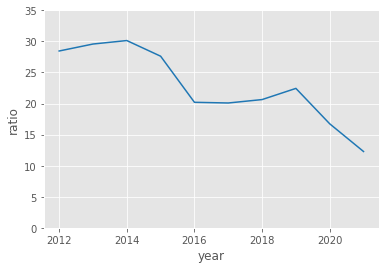

In [419]:
sns.lineplot(data = df1_arrest_ratio, x = 'year', y = 'ratio', color = 'tab:blue')
plt.ylim(0,35)
plt.show()

# 가장 많이 일어난 범죄 (primary_type)

In [191]:
df1['primary_type'].value_counts()

THEFT                                578859
CRIMINAL DAMAGE                      254106
BATTERY                              247581
NARCOTICS                            188126
DECEPTIVE PRACTICE                   162246
ASSAULT                              139972
BURGLARY                             130957
OTHER OFFENSE                        111030
MOTOR VEHICLE THEFT                  109828
ROBBERY                              100238
CRIMINAL TRESPASS                     61556
WEAPONS VIOLATION                     50771
PUBLIC PEACE VIOLATION                18699
INTERFERENCE WITH PUBLIC OFFICER      11003
PROSTITUTION                          10104
OFFENSE INVOLVING CHILDREN             9971
SEX OFFENSE                            9116
CRIM SEXUAL ASSAULT                    9032
HOMICIDE                               5666
ARSON                                  4269
CRIMINAL SEXUAL ASSAULT                3234
LIQUOR LAW VIOLATION                   2967
GAMBLING                        

In [192]:
# 같은 항목, 다른 표기 통합
df1['primary_type'] = df1['primary_type'].replace('NON - CRIMINAL', 'NON-CRIMINAL')
df1['primary_type'] = df1['primary_type'].replace('NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL')
df1

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/935409946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_type'] = df1['primary_type'].replace('NON - CRIMINAL', 'NON-CRIMINAL')
/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_35602/935409946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_type'] = df1['primary_type'].replace('NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL')


,unique_key,date,primary_type,location_description,arrest,domestic,beat,community_area,month,year,only_month
0,8429131,2012-01-01 01:00:00+00:00,DECEPTIVE PRACTICE,ATM (AUTOMATIC TELLER MACHINE),False,False,1834,8.0,2012-01,2012,01
1,8452622,2012-01-01 01:00:00+00:00,THEFT,TAVERN/LIQUOR STORE,False,False,1832,8.0,2012-01,2012,01
2,8608264,2012-01-01 01:00:00+00:00,THEFT,MEDICAL/DENTAL OFFICE,False,False,1423,24.0,2012-01,2012,01
3,9142576,2012-01-01 01:00:00+00:00,THEFT,"SCHOOL, PUBLIC, BUILDING",False,False,1523,25.0,2012-01,2012,01
5,9049473,2012-01-01 01:00:00+00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,332,43.0,2012-01,2012,01
...,...,...,...,...,...,...,...,...,...,...,...
2670248,12581388,2021-12-31 12:45:00+00:00,ASSAULT,APARTMENT,False,False,221,39.0,2021-12,2021,12
2670249,12581450,2021-12-31 12:45:00+00:00,CONCEALED CARRY LICENSE VIOLATION,STREET,True,False,614,71.0,2021-12,2021,12
2670250,12581977,2021-12-31 12:46:00+00:00,ASSAULT,COMMERCIAL / BUSINESS OFFICE,False,False,623,44.0,2021-12,2021,12
2670251,12582396,2021-12-31 12:49:00+00:00,DECEPTIVE PRACTICE,RESIDENCE,False,False,611,71.0,2021-12,2021,12


In [193]:
df1['primary_type'].value_counts()

THEFT                                578859
CRIMINAL DAMAGE                      254106
BATTERY                              247581
NARCOTICS                            188126
DECEPTIVE PRACTICE                   162246
ASSAULT                              139972
BURGLARY                             130957
OTHER OFFENSE                        111030
MOTOR VEHICLE THEFT                  109828
ROBBERY                              100238
CRIMINAL TRESPASS                     61556
WEAPONS VIOLATION                     50771
PUBLIC PEACE VIOLATION                18699
INTERFERENCE WITH PUBLIC OFFICER      11003
PROSTITUTION                          10104
OFFENSE INVOLVING CHILDREN             9971
SEX OFFENSE                            9116
CRIM SEXUAL ASSAULT                    9032
HOMICIDE                               5666
ARSON                                  4269
CRIMINAL SEXUAL ASSAULT                3234
LIQUOR LAW VIOLATION                   2967
GAMBLING                        

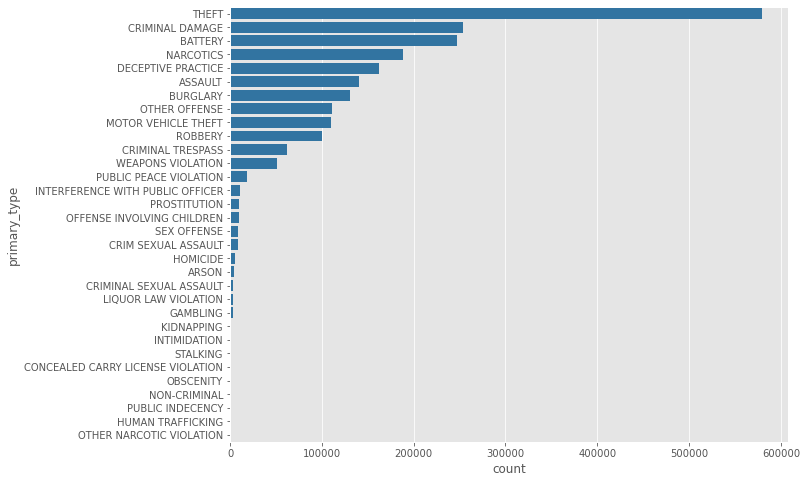

In [194]:
plt.figure(figsize = (10,8))
sns.countplot(data = df1, y = 'primary_type', order = df1['primary_type'].value_counts().index, color = 'tab:blue')
plt.show()

In [195]:
#상위 5개 분석

df_theft = df1.loc[df1['primary_type'] == 'THEFT']
df_criminalDamage = df1.loc[df1['primary_type'] == 'CRIMINAL DAMAGE']
df_battery = df1.loc[df1['primary_type'] == 'BATTERY']
df_narcotics = df1.loc[df1['primary_type'] == 'NARCOTICS']
df_deceptivePractice = df1.loc[df1['primary_type'] == 'DECEPTIVE PRACTICE']

# theft
절도

In [196]:
df_theft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578859 entries, 1 to 2670245
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   unique_key            578859 non-null  int64              
 1   date                  578859 non-null  datetime64[ns, UTC]
 2   primary_type          578859 non-null  object             
 3   location_description  578859 non-null  object             
 4   arrest                578859 non-null  bool               
 5   domestic              578859 non-null  bool               
 6   beat                  578859 non-null  int64              
 7   community_area        578859 non-null  float64            
 8   month                 578859 non-null  object             
 9   year                  578859 non-null  object             
 10  only_month            578859 non-null  object             
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int

## 기간별 발생 수

In [197]:
df_theft['year'].value_counts()

2012    72924
2013    69447
2018    62975
2017    62091
2019    60109
2014    59566
2016    59367
2015    55283
2020    39068
2021    38029
Name: year, dtype: int64

In [391]:
df_theft['year'].value_counts().reset_index().sort_values(by = 'index')

,index,year
0,2012,72924
1,2013,69447
5,2014,59566
7,2015,55283
6,2016,59367
3,2017,62091
2,2018,62975
4,2019,60109
8,2020,39068
9,2021,38029


In [225]:
df_theft['year'].value_counts() / 72924 *100

2012    100.000000
2013     95.232022
2018     86.357029
2017     85.144808
2019     82.426910
2014     81.682299
2016     81.409413
2015     75.809061
2020     53.573583
2021     52.148812
Name: year, dtype: float64

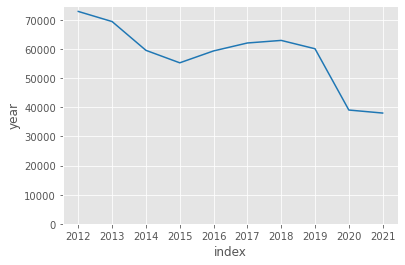

In [394]:
sns.lineplot(data = df_theft['year'].value_counts().reset_index().sort_values(by = 'index'), x = 'index', y = 'year', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.show()

- 우하향
- 2019~2020년 사이 급감
- 2021년 발생 건수는 2012년 발생 건수의 52%

## 가장 많이 일어난 장소(location_description)

In [199]:
df_theft['location_description'].value_counts().head(10)

STREET                            141460
RESIDENCE                          47228
APARTMENT                          35229
SMALL RETAIL STORE                 34589
DEPARTMENT STORE                   30804
OTHER                              28059
SIDEWALK                           22828
PARKING LOT/GARAGE(NON.RESID.)     22553
RESTAURANT                         21700
GROCERY FOOD STORE                 20064
Name: location_description, dtype: int64

In [493]:
df_theft['location_description'].value_counts().head(10).reset_index()

,index,location_description
0,STREET,141460
1,RESIDENCE,47228
2,APARTMENT,35229
3,SMALL RETAIL STORE,34589
4,DEPARTMENT STORE,30804
5,OTHER,28059
6,SIDEWALK,22828
7,PARKING LOT/GARAGE(NON.RESID.),22553
8,RESTAURANT,21700
9,GROCERY FOOD STORE,20064


In [396]:
df_theft['location_description'].value_counts().head(10) / 578859 *100

STREET                            24.437730
RESIDENCE                          8.158809
APARTMENT                          6.085938
SMALL RETAIL STORE                 5.975376
DEPARTMENT STORE                   5.321503
OTHER                              4.847294
SIDEWALK                           3.943620
PARKING LOT/GARAGE(NON.RESID.)     3.896113
RESTAURANT                         3.748754
GROCERY FOOD STORE                 3.466129
Name: location_description, dtype: float64

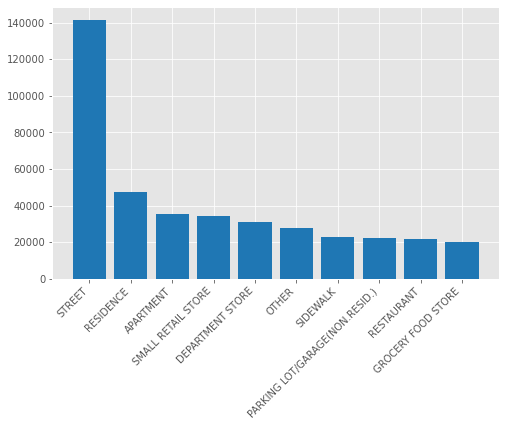

In [501]:
plt.figure(figsize = (8,5))
plt.bar(data = df_theft['location_description'].value_counts().head(10).reset_index(), x = 'index', height = 'location_description', color = 'tab:blue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

- 절도는 거리에서 가장 많이 일어난다. 전체의 약 24%

## 가장 많이 일어난 구역 (community_area)

In [200]:
df_theft['community_area'].value_counts().head(10)

8.0     46393
32.0    41848
28.0    29622
24.0    26648
6.0     22269
25.0    21475
7.0     19020
22.0    16252
43.0    13066
44.0    12964
Name: community_area, dtype: int64

In [514]:
df_theft_commu = df_theft['community_area'].value_counts().head(10).reset_index()
df_theft_commu

,index,community_area
0,8.0,46393
1,32.0,41848
2,28.0,29622
3,24.0,26648
4,6.0,22269
5,25.0,21475
6,7.0,19020
7,22.0,16252
8,43.0,13066
9,44.0,12964


In [515]:
df_theft_commu['index'] = df_theft_commu['index'].astype('int32')
df_theft_commu['index'] = df_theft_commu['index'].astype('str')

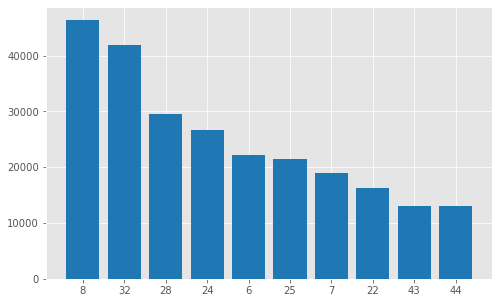

In [516]:
plt.figure(figsize = (8,5))
plt.bar(data = df_theft_commu, x = 'index', height = 'community_area', color = 'tab:blue')
plt.show()

- 절도의 대부분은 Central(8,32) 주변 구역이었다.
- demographic은 white가 대부분(참고: http://www.energyjustice.net/justice/index.php?gsLayer=plural&gfLon=-87.68941177&gfLat=41.8774849&giZoom=12)
- 시카고의 해당 지역을 검색해보니 관광지가 많다(반대로 '시카고 여행' 검색 시에도 해당 지역이 많이 뜬다) -> 여행객들이 많다 -> 절도와 여행지는 상관 관계가 있는 듯 하다.
https://gocity.com/chicago/en-us/blog/chicago-neighborhoods

## 관할 지구대

In [397]:
df_theft['beat'].value_counts().head(10)

1834    12052
111     10178
112      9892
1833     8402
1831     8047
122      7140
123      5868
1424     5493
2533     5050
114      4716
Name: beat, dtype: int64

In [517]:
df_theft_beat = df_theft['beat'].value_counts().head(10).reset_index()
df_theft_beat

,index,beat
0,1834,12052
1,111,10178
2,112,9892
3,1833,8402
4,1831,8047
5,122,7140
6,123,5868
7,1424,5493
8,2533,5050
9,114,4716


In [521]:
df_theft_beat['index'] = df_theft_beat['index'].astype('str')

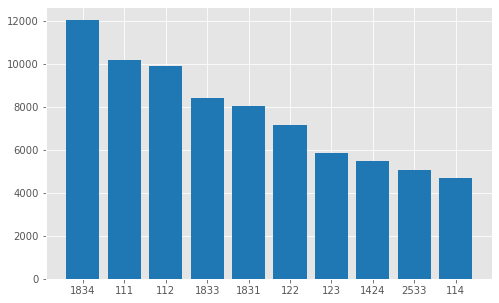

In [522]:
plt.figure(figsize = (8,5))
plt.bar(data = df_theft_beat, x = 'index', height = 'beat', color = 'tab:blue')
plt.show()

- 해당 커뮤니티 지역 중에서도 1834, 111번 지구대가 담당하는 구역에서 가장 많이 일어났다.
    > 두 지역은 커뮤니티 8번, 32번이 맞닿아있는 부분이다
- 111,112,113번은 구역이 세밀하게 분류되어 있음에도 발생 건수가 상위권을 차지

## 체포 여부 (arrest)

In [201]:
df_theft['arrest'].value_counts() / 579344

False    0.897750
True     0.101413
Name: arrest, dtype: float64

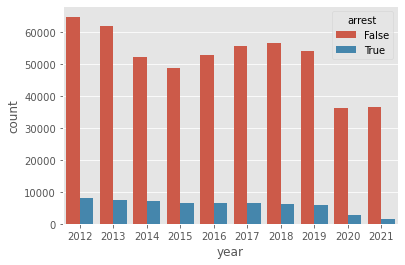

In [202]:
sns.countplot(data = df_theft, x = 'year', hue = 'arrest')
plt.show()

In [254]:
df_theft_arrest = pd.DataFrame(df_theft.groupby('year')['arrest'].value_counts())
df_theft_arrest.columns = ['count']
df_theft_arrest = df_theft_arrest.reset_index()
df_theft_arrest

,year,arrest,count
0,2012,False,64835
1,2012,True,8089
2,2013,False,61873
3,2013,True,7574
4,2014,False,52278
5,2014,True,7288
6,2015,False,48656
7,2015,True,6627
8,2016,False,52961
9,2016,True,6406


In [294]:
df_theft_arrest['year'] = df_theft_arrest['year'].astype('int32')
df_theft_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20 non-null     int32
 1   arrest  20 non-null     bool 
 2   count   20 non-null     int64
dtypes: bool(1), int32(1), int64(1)
memory usage: 388.0 bytes


In [416]:
theft_arrest_ratio = pd.DataFrame(columns = ['year', 'ratio'])
theft_arrest_ratio

,year,ratio


In [417]:
arrest_ratio(2012, df_theft_arrest, theft_arrest_ratio)
theft_arrest_ratio

,year,ratio
0,2012.0,11.09
1,2013.0,10.91
2,2014.0,12.24
3,2015.0,11.99
4,2016.0,10.79
5,2017.0,10.25
6,2018.0,9.88
7,2019.0,9.96
8,2020.0,6.98
9,2021.0,3.87


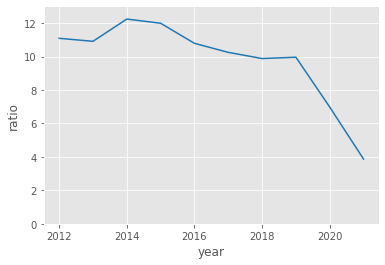

In [428]:
sns.lineplot(data = theft_arrest_ratio, x = 'year', y = 'ratio', color = 'tab:blue')
plt.ylim(0,13)
plt.show()

- 체포율은 10% 안팎이다.
- 최근으로 갈수록 체포율이 낮아진다.

참고: https://www.google.com/search?q=chicago+crime+rate&source=lmns&bih=969&biw=1920&hl=ko&sa=X&ved=2ahUKEwixppK5jej2AhUFc5QKHZ4tBKIQ_AUoAHoECAEQAA
</br>
loop 등 센트럴 지역은 안전하긴 하나, pickpocket들을 주의해야한다고 구글에 바로 뜬다.

# CRIMINAL DAMAGE
손괴죄
- The Criminal Damage Act 1971 classifies criminal damage as:
    >‘A person who, without lawful excuse, destroys or damages any property belonging to another, intending to destroy or damage any such property, or being reckless as to whether any such property would be destroyed or damaged.’

    - This offence is wide ranging and applies to any tangible property.  For damage to be inflicted on a property however, it must be more than minimal and create a situation where the property’s value or usefulness has been affected in some way.

In [424]:
df_criminalDamage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254106 entries, 9 to 2670237
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   unique_key            254106 non-null  int64              
 1   date                  254106 non-null  datetime64[ns, UTC]
 2   primary_type          254106 non-null  object             
 3   location_description  254106 non-null  object             
 4   arrest                254106 non-null  bool               
 5   domestic              254106 non-null  bool               
 6   beat                  254106 non-null  int64              
 7   community_area        254106 non-null  float64            
 8   month                 254106 non-null  object             
 9   year                  254106 non-null  object             
 10  only_month            254106 non-null  object             
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int

## 기간별 발생 수

In [421]:
df_criminalDamage['year'].value_counts()

2012    32482
2016    27673
2013    27666
2017    25717
2015    25639
2014    24948
2018    24560
2019    23480
2020    21191
2021    20750
Name: year, dtype: int64

In [422]:
df_criminalDamage['year'].value_counts().reset_index().sort_values(by = 'index')

,index,year
0,2012,32482
2,2013,27666
5,2014,24948
4,2015,25639
1,2016,27673
3,2017,25717
6,2018,24560
7,2019,23480
8,2020,21191
9,2021,20750


In [426]:
df_criminalDamage['year'].value_counts() / 32482 *100

2012    100.000000
2016     85.194877
2013     85.173327
2017     79.173080
2015     78.932947
2014     76.805615
2018     75.611108
2019     72.286189
2020     65.239209
2021     63.881534
Name: year, dtype: float64

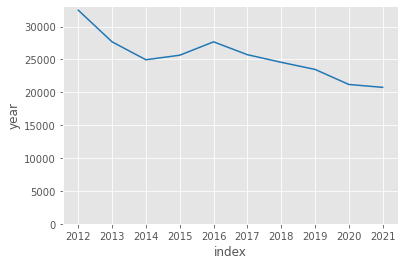

In [427]:
sns.lineplot(data = df_criminalDamage['year'].value_counts().reset_index().sort_values(by = 'index'), x = 'index', y = 'year', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.show()

- 우하향
- 2016년도 잠시 증가했다가 다시 하락
- 2021년 발생 건수는 2012년 발생 건수의 약 64%

## 가장 많이 일어난 장소(location_description)

In [430]:
df_criminalDamage['location_description'].value_counts().head(10)

STREET                            92272
RESIDENCE                         42690
APARTMENT                         29815
PARKING LOT/GARAGE(NON.RESID.)    10635
RESIDENCE-GARAGE                   9504
OTHER                              7278
RESIDENTIAL YARD (FRONT/BACK)      6255
VEHICLE NON-COMMERCIAL             4707
ALLEY                              4058
RESTAURANT                         3885
Name: location_description, dtype: int64

In [429]:
df_criminalDamage['location_description'].value_counts().head(10) / 254106 *100

STREET                            36.312405
RESIDENCE                         16.800076
APARTMENT                         11.733292
PARKING LOT/GARAGE(NON.RESID.)     4.185261
RESIDENCE-GARAGE                   3.740171
OTHER                              2.864159
RESIDENTIAL YARD (FRONT/BACK)      2.461571
VEHICLE NON-COMMERCIAL             1.852377
ALLEY                              1.596971
RESTAURANT                         1.528890
Name: location_description, dtype: float64

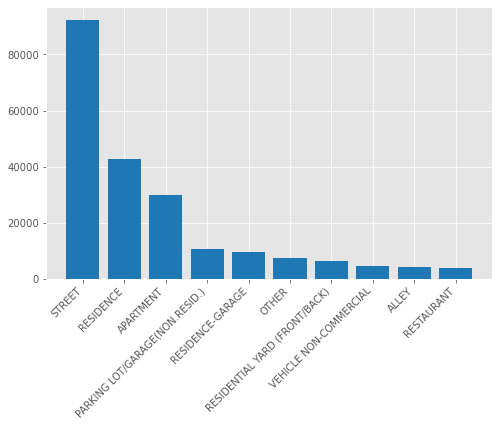

In [523]:
plt.figure(figsize = (8,5))
plt.bar(data = df_criminalDamage['location_description'].value_counts().head(10).reset_index(), x = 'index', height = 'location_description', color = 'tab:blue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

- 손괴죄는 거리에서 가장 많이 일어난다. 전체의 약 36%
- 절도는 여러 지역에서 고루 일어나는 반면, 손괴는 거리, 거주지 중심으로 50% 이상 일어났다.
    > 아무래도 물건이 상주하는 곳이어야 해서 그런듯

## 가장 많이 일어난 구역 (community_area)

In [432]:
df_criminalDamage['community_area'].value_counts().head(10)

25.0    12749
43.0     8834
24.0     8227
49.0     7375
28.0     7320
71.0     7053
29.0     6684
23.0     6591
67.0     6416
69.0     6224
Name: community_area, dtype: int64

In [524]:
df_criminalDamage_commu = df_criminalDamage['community_area'].value_counts().head(10).reset_index()
df_criminalDamage_commu

,index,community_area
0,25.0,12749
1,43.0,8834
2,24.0,8227
3,49.0,7375
4,28.0,7320
5,71.0,7053
6,29.0,6684
7,23.0,6591
8,67.0,6416
9,69.0,6224


In [525]:
df_criminalDamage_commu['index'] = df_criminalDamage_commu['index'].astype('int32')
df_criminalDamage_commu['index'] = df_criminalDamage_commu['index'].astype('str')

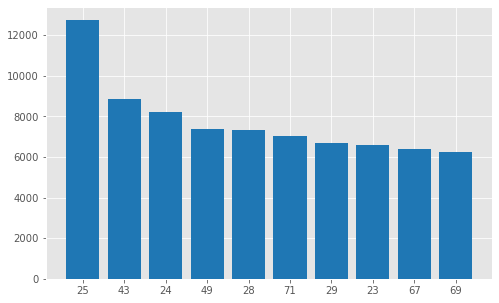

In [526]:
plt.figure(figsize = (8,5))
plt.bar(data = df_criminalDamage_commu, x = 'index', height = 'community_area', color = 'tab:blue')
plt.show()

- racial demographic을 보면 black이 대부분이다. (참고: http://www.energyjustice.net/justice/index.php?gsLayer=plural&gfLon=-87.68941177&gfLat=41.8774849&giZoom=12)
- theft와는 다른 구역에서 주로 일어남

## 관할 지구대

In [431]:
df_criminalDamage['beat'].value_counts().head(10)

511    2416
423    2146
813    2136
421    1908
823    1776
414    1728
523    1667
631    1636
624    1635
432    1597
Name: beat, dtype: int64

In [527]:
df_criminalDamage_beat = df_criminalDamage['beat'].value_counts().head(10).reset_index()
df_criminalDamage_beat

,index,beat
0,511,2416
1,423,2146
2,813,2136
3,421,1908
4,823,1776
5,414,1728
6,523,1667
7,631,1636
8,624,1635
9,432,1597


In [528]:
df_criminalDamage_beat['index'] = df_criminalDamage_beat['index'].astype('str')

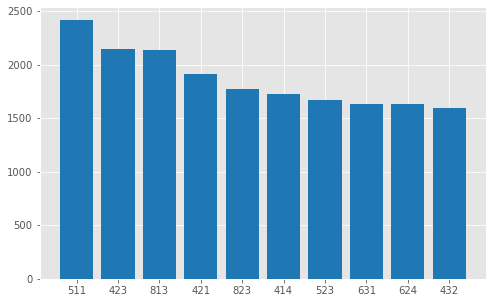

In [529]:
plt.figure(figsize = (8,5))
plt.bar(data = df_criminalDamage_beat, x = 'index', height = 'beat', color = 'tab:blue')
plt.show()

- 커뮤니티로 보면 25구역이 가장 많지만, 지구대 담당 비율로 보면 49구역(Roseland)이 1위
- 46, 48구역 닿아있는 지구대 423이 2위이다. 심지어 건수로 봤을 때 순위권에 들어가지도 않음
- 56, 62, 64, 65 한가운데 지키는 지구대 813이 3위
    > 커뮤니티 건수랑 관할 지구대 담당 건수가 차이남
    
- 커뮤니티 1순위인 25구역은 약 12개의 관할 지구대로 나뉘어서 담당하기 때문에 지구대 기준 상대적으로 건수가 적게 보임

## 체포 여부 (arrest)

In [433]:
df_criminalDamage['arrest'].value_counts().head(10) / 254106 *100

False    94.724642
True      5.275358
Name: arrest, dtype: float64

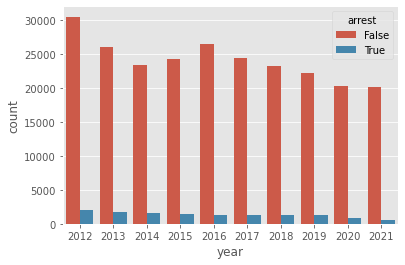

In [207]:
sns.countplot(data = df_criminalDamage, x = 'year', hue = 'arrest')
plt.show()

In [434]:
df_criminalDamage_arrest = pd.DataFrame(df_criminalDamage.groupby('year')['arrest'].value_counts())
df_criminalDamage_arrest.columns = ['count']
df_criminalDamage_arrest = df_criminalDamage_arrest.reset_index()
df_criminalDamage_arrest

,year,arrest,count
0,2012,False,30459
1,2012,True,2023
2,2013,False,26002
3,2013,True,1664
4,2014,False,23311
5,2014,True,1637
6,2015,False,24241
7,2015,True,1398
8,2016,False,26407
9,2016,True,1266


In [435]:
df_criminalDamage_arrest['year'] = df_criminalDamage_arrest['year'].astype('int32')
df_criminalDamage_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20 non-null     int32
 1   arrest  20 non-null     bool 
 2   count   20 non-null     int64
dtypes: bool(1), int32(1), int64(1)
memory usage: 388.0 bytes


In [436]:
criminalDamage_arrest_ratio = pd.DataFrame(columns = ['year', 'ratio'])
criminalDamage_arrest_ratio

,year,ratio


In [437]:
arrest_ratio(2012, df_criminalDamage_arrest, criminalDamage_arrest_ratio)
criminalDamage_arrest_ratio

,year,ratio
0,2012.0,6.23
1,2013.0,6.01
2,2014.0,6.56
3,2015.0,5.45
4,2016.0,4.57
5,2017.0,5.18
6,2018.0,5.24
7,2019.0,5.57
8,2020.0,4.15
9,2021.0,2.94


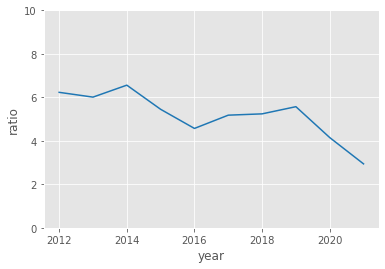

In [439]:
sns.lineplot(data = criminalDamage_arrest_ratio, x = 'year', y = 'ratio', color = 'tab:blue')
plt.ylim(0,10)
plt.show()

- 체포율은 약 6% 안팎이다.
- 다른 범죄에 비해 체포율이 낮고, 최근으로 갈수록 체포율이 낮아진다.

# BATTERY
폭행

In [444]:
df_battery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247581 entries, 13 to 2670252
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   unique_key            247581 non-null  int64              
 1   date                  247581 non-null  datetime64[ns, UTC]
 2   primary_type          247581 non-null  object             
 3   location_description  247581 non-null  object             
 4   arrest                247581 non-null  bool               
 5   domestic              247581 non-null  bool               
 6   beat                  247581 non-null  int64              
 7   community_area        247581 non-null  float64            
 8   month                 247581 non-null  object             
 9   year                  247581 non-null  object             
 10  only_month            247581 non-null  object             
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), in

## 기간별 발생 수

In [440]:
df_battery['year'].value_counts()

2012    30298
2013    27419
2016    25872
2019    25650
2018    25447
2014    25439
2017    25384
2015    24633
2020    19963
2021    17476
Name: year, dtype: int64

In [441]:
df_battery['year'].value_counts().reset_index().sort_values(by = 'index')

,index,year
0,2012,30298
1,2013,27419
5,2014,25439
7,2015,24633
2,2016,25872
6,2017,25384
4,2018,25447
3,2019,25650
8,2020,19963
9,2021,17476


In [442]:
df_battery['year'].value_counts() / 30298 *100

2012    100.000000
2013     90.497723
2016     85.391775
2019     84.659053
2018     83.989042
2014     83.962638
2017     83.781108
2015     81.302396
2020     65.888838
2021     57.680375
Name: year, dtype: float64

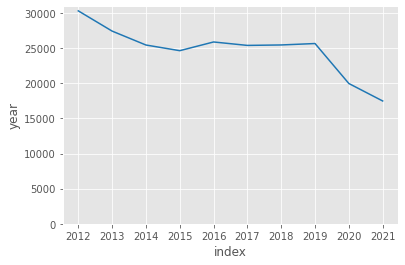

In [443]:
sns.lineplot(data = df_battery['year'].value_counts().reset_index().sort_values(by = 'index'), x = 'index', y = 'year', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.show()

- 우하향
- 2019~2020 급감
- 2021년 발생 건수는 2012년 발생 건수의 약 57%

## 가장 많이 일어난 장소(location_description)

In [209]:
df_battery['location_description'].value_counts().head(10)

SIDEWALK                    52453
STREET                      44292
APARTMENT                   26843
RESIDENCE                   21702
SCHOOL, PUBLIC, BUILDING    12086
ALLEY                        6986
OTHER                        6874
RESIDENCE PORCH/HALLWAY      5542
RESTAURANT                   5293
BAR OR TAVERN                4718
Name: location_description, dtype: int64

In [445]:
df_battery['location_description'].value_counts().head(10) / 247581 *100

SIDEWALK                    21.186198
STREET                      17.889903
APARTMENT                   10.842108
RESIDENCE                    8.765616
SCHOOL, PUBLIC, BUILDING     4.881635
ALLEY                        2.821703
OTHER                        2.776465
RESIDENCE PORCH/HALLWAY      2.238459
RESTAURANT                   2.137886
BAR OR TAVERN                1.905639
Name: location_description, dtype: float64

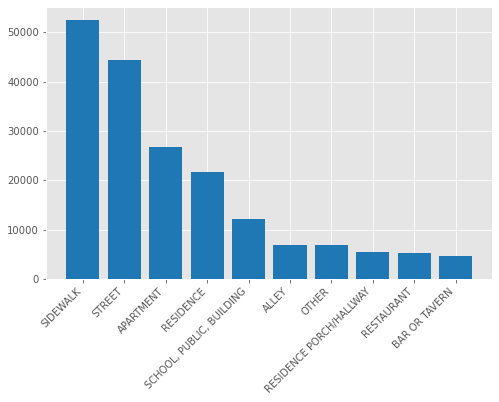

In [530]:
plt.figure(figsize = (8,5))
plt.bar(data = df_battery['location_description'].value_counts().head(10).reset_index(), x = 'index', height = 'location_description', color = 'tab:blue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

- 폭행은 인도(사람이 걸어다니는 길)에서 가장 많이 일어난다. 전체의 약 21%
- 인도, 거리, 거주지(아파트 및 레지던스) 중심으로 50% 이상 일어났다.
- 특이하게 '학교'/공공장소/건물 이 5위.. 레스토랑, 술집도 10위 안에 올라왔다.

## 가장 많이 일어난 구역 (community_area)

In [210]:
df_battery['community_area'].value_counts().head(10)

25.0    15465
8.0      9848
29.0     8896
43.0     8346
23.0     7881
28.0     7618
67.0     7448
68.0     7092
69.0     6989
71.0     6933
Name: community_area, dtype: int64

In [531]:
df_battery_commu = df_battery['community_area'].value_counts().head(10).reset_index()
df_battery_commu

,index,community_area
0,25.0,15465
1,8.0,9848
2,29.0,8896
3,43.0,8346
4,23.0,7881
5,28.0,7618
6,67.0,7448
7,68.0,7092
8,69.0,6989
9,71.0,6933


In [532]:
df_battery_commu['index'] = df_battery_commu['index'].astype('int32')
df_battery_commu['index'] = df_battery_commu['index'].astype('str')

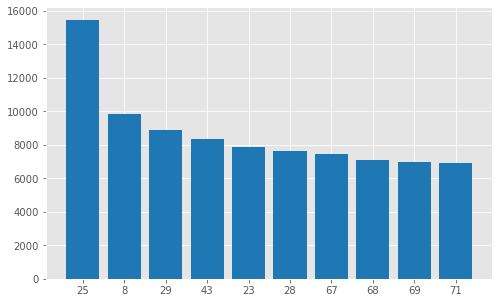

In [533]:
plt.figure(figsize = (8,5))
plt.bar(data = df_battery_commu, x = 'index', height = 'community_area', color = 'tab:blue')
plt.show()

## 관할 지구대

In [446]:
df_battery['beat'].value_counts().head(10)

1831    2404
421     2243
1533    2113
624     2091
423     1992
1924    1921
511     1853
533     1792
1112    1790
1834    1770
Name: beat, dtype: int64

In [534]:
df_battery_beat = df_battery['beat'].value_counts().head(10).reset_index()
df_battery_beat

,index,beat
0,1831,2404
1,421,2243
2,1533,2113
3,624,2091
4,423,1992
5,1924,1921
6,511,1853
7,533,1792
8,1112,1790
9,1834,1770


In [535]:
df_battery_beat['index'] = df_battery_beat['index'].astype('str')

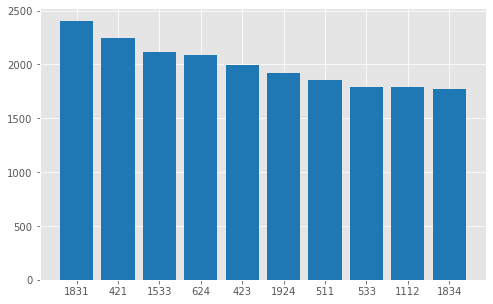

In [536]:
plt.figure(figsize = (8,5))
plt.bar(data = df_battery_beat, x = 'index', height = 'beat', color = 'tab:blue')
plt.show()

- 지구대는 8구역 맡는 1831이 1등
- 43구역 레인보우비치 주변 담당 421번 지구대 2등 
- 25구역 가장 우하단 담당 1533번 지구대 3등
- 46, 48구역 닿아있는 지구대 423 이번에도 순위권이다. 

    
- 커뮤니티 1순위인 25구역은 약 12개의 관할 지구대로 나뉘어서 담당하기 때문에 지구대 기준 상대적으로 건수가 적게 보임. 그 와중에 1533번 담당 구역은..

- 지금까지 범죄가 일어나는 지역이 비슷비슷하다.

## 체포 여부 (arrest)

In [447]:
df_battery['arrest'].value_counts().head(10) / 247581*100

False    78.687783
True     21.312217
Name: arrest, dtype: float64

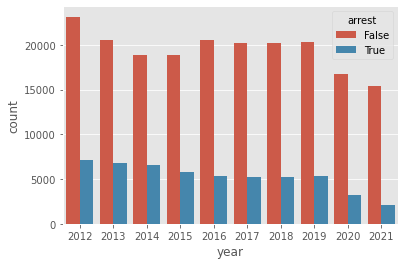

In [212]:
sns.countplot(data = df_battery, x = 'year', hue = 'arrest')
plt.show()

In [448]:
df_battery_arrest = pd.DataFrame(df_battery.groupby('year')['arrest'].value_counts())
df_battery_arrest.columns = ['count']
df_battery_arrest = df_battery_arrest.reset_index()
df_battery_arrest

,year,arrest,count
0,2012,False,23151
1,2012,True,7147
2,2013,False,20597
3,2013,True,6822
4,2014,False,18881
5,2014,True,6558
6,2015,False,18825
7,2015,True,5808
8,2016,False,20582
9,2016,True,5290


In [449]:
df_battery_arrest['year'] = df_battery_arrest['year'].astype('int32')
df_battery_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20 non-null     int32
 1   arrest  20 non-null     bool 
 2   count   20 non-null     int64
dtypes: bool(1), int32(1), int64(1)
memory usage: 388.0 bytes


In [450]:
battery_arrest_ratio = pd.DataFrame(columns = ['year', 'ratio'])
battery_arrest_ratio

,year,ratio


In [451]:
arrest_ratio(2012, df_battery_arrest, battery_arrest_ratio)
battery_arrest_ratio

,year,ratio
0,2012.0,23.59
1,2013.0,24.88
2,2014.0,25.78
3,2015.0,23.58
4,2016.0,20.45
5,2017.0,20.52
6,2018.0,20.52
7,2019.0,20.93
8,2020.0,16.35
9,2021.0,11.88


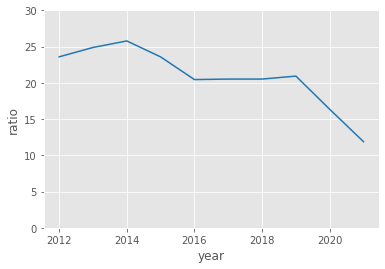

In [453]:
sns.lineplot(data = battery_arrest_ratio, x = 'year', y = 'ratio', color = 'tab:blue')
plt.ylim(0,30)
plt.show()

- 체포율은 약 20% 안팎이다.
- 다른 범죄에 비해 상대적으로 체포율이 높고, 최근으로 갈수록 체포율이 낮아진다.

# NARCOTICS
마약 범죄

In [454]:
df_narcotics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188126 entries, 72 to 2670102
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   unique_key            188126 non-null  int64              
 1   date                  188126 non-null  datetime64[ns, UTC]
 2   primary_type          188126 non-null  object             
 3   location_description  188126 non-null  object             
 4   arrest                188126 non-null  bool               
 5   domestic              188126 non-null  bool               
 6   beat                  188126 non-null  int64              
 7   community_area        188126 non-null  float64            
 8   month                 188126 non-null  object             
 9   year                  188126 non-null  object             
 10  only_month            188126 non-null  object             
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), in

## 기간별 발생 수

In [456]:
df_narcotics['year'].value_counts().reset_index().sort_values(by = 'index')

,index,year
0,2012,35465
1,2013,34110
2,2014,29104
3,2015,23932
6,2016,13324
7,2017,11669
5,2018,13567
4,2019,15055
8,2020,7476
9,2021,4424


In [457]:
df_narcotics['year'].value_counts() / 35465 *100

2012    100.000000
2013     96.179332
2014     82.064007
2015     67.480615
2019     42.450303
2018     38.254617
2016     37.569435
2017     32.902862
2020     21.079938
2021     12.474270
Name: year, dtype: float64

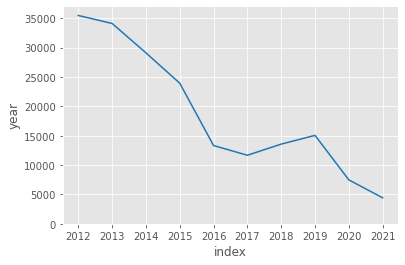

In [458]:
sns.lineplot(data = df_narcotics['year'].value_counts().reset_index().sort_values(by = 'index'), x = 'index', y = 'year', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.show()

- 우하향
- 2015~6 급감
- 2017~9 다시 약간 상승했다가 20년도 감소
- 2021년 발생 건수는 2012년 발생 건수의 약 12%

## 가장 많이 일어난 장소(location_description)

In [459]:
df_narcotics['location_description'].value_counts().head(10)

SIDEWALK                           61003
STREET                             55481
ALLEY                              12703
VEHICLE NON-COMMERCIAL              8810
RESIDENCE                           7207
APARTMENT                           6003
PARKING LOT/GARAGE(NON.RESID.)      5257
RESIDENTIAL YARD (FRONT/BACK)       2920
POLICE FACILITY/VEH PARKING LOT     2686
PARK PROPERTY                       2506
Name: location_description, dtype: int64

In [460]:
df_narcotics['location_description'].value_counts().head(10) / 188126 *100

SIDEWALK                           32.426671
STREET                             29.491405
ALLEY                               6.752389
VEHICLE NON-COMMERCIAL              4.683032
RESIDENCE                           3.830943
APARTMENT                           3.190946
PARKING LOT/GARAGE(NON.RESID.)      2.794404
RESIDENTIAL YARD (FRONT/BACK)       1.552151
POLICE FACILITY/VEH PARKING LOT     1.427766
PARK PROPERTY                       1.332086
Name: location_description, dtype: float64

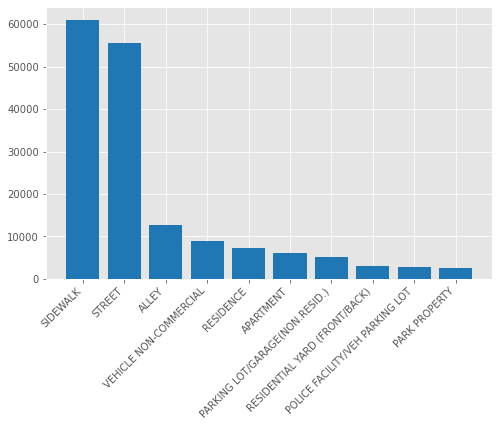

In [537]:
plt.figure(figsize = (8,5))
plt.bar(data = df_narcotics['location_description'].value_counts().head(10).reset_index(), x = 'index', height = 'location_description', color = 'tab:blue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

- 마약은 인도(사람이 걸어다니는 길)에서 가장 많이 일어난다. 전체의 약 32%
- 인도, 거리 중심으로 약 60% 일어났다.

## 가장 많이 일어난 구역 (community_area)

In [215]:
df_narcotics['community_area'].value_counts().head(10)

25.0    23846
29.0    17375
23.0    17277
26.0    15016
27.0     9618
67.0     6961
68.0     5536
71.0     5486
43.0     5070
49.0     4960
Name: community_area, dtype: int64

In [538]:
df_narcotics_commu = df_narcotics['community_area'].value_counts().head(10).reset_index()
df_narcotics_commu

,index,community_area
0,25.0,23846
1,29.0,17375
2,23.0,17277
3,26.0,15016
4,27.0,9618
5,67.0,6961
6,68.0,5536
7,71.0,5486
8,43.0,5070
9,49.0,4960


In [539]:
df_narcotics_commu['index'] = df_narcotics_commu['index'].astype('int32')
df_narcotics_commu['index'] = df_narcotics_commu['index'].astype('str')

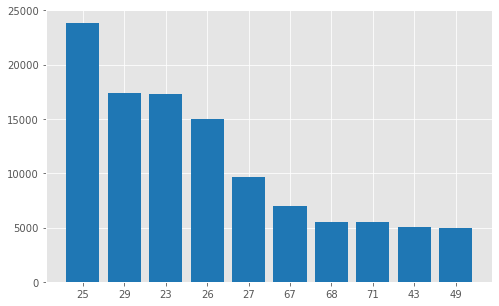

In [540]:
plt.figure(figsize = (8,5))
plt.bar(data = df_narcotics_commu, x = 'index', height = 'community_area', color = 'tab:blue')
plt.show()

- 25구역 또 1위 등극!

## 관할 지구대

In [471]:
df_narcotics['beat'].value_counts().head(10)

1112    6244
1121    5362
1134    4708
1533    4708
1132    4691
1122    4503
1011    4020
1115    3905
1133    3281
1532    3173
Name: beat, dtype: int64

In [541]:
df_narcotics_beat = df_narcotics['beat'].value_counts().head(10).reset_index()
df_narcotics_beat

,index,beat
0,1112,6244
1,1121,5362
2,1134,4708
3,1533,4708
4,1132,4691
5,1122,4503
6,1011,4020
7,1115,3905
8,1133,3281
9,1532,3173


In [542]:
df_narcotics_beat['index'] = df_narcotics_beat['index'].astype('str')

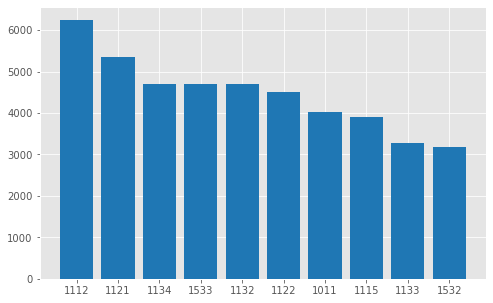

In [543]:
plt.figure(figsize = (8,5))
plt.bar(data = df_narcotics_beat, x = 'index', height = 'beat', color = 'tab:blue')
plt.show()

- 왜 계속 비슷한 지역에서 범죄가 일어나나요 ㅠ
- 25구역 가장 우하단 담당 1533번 지구대 4등


## 체포 여부 (arrest)

In [461]:
df_narcotics['arrest'].value_counts().head(10) / 188126*100

True     99.547644
False     0.452356
Name: arrest, dtype: float64

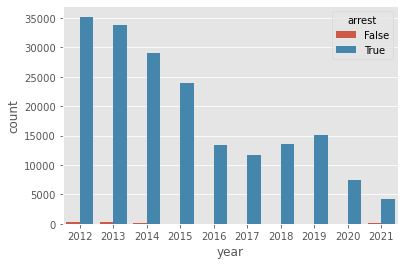

In [217]:
sns.countplot(data = df_narcotics, x = 'year', hue = 'arrest')
plt.show()

- 검거율이 99%

In [462]:
df_narcotics_arrest = pd.DataFrame(df_narcotics.groupby('year')['arrest'].value_counts())
df_narcotics_arrest.columns = ['count']
df_narcotics_arrest = df_narcotics_arrest.reset_index()
df_narcotics_arrest

,year,arrest,count
0,2012,True,35208
1,2012,False,257
2,2013,True,33805
3,2013,False,305
4,2014,True,28990
5,2014,False,114
6,2015,True,23924
7,2015,False,8
8,2016,True,13318
9,2016,False,6


In [463]:
df_narcotics_arrest['year'] = df_narcotics_arrest['year'].astype('int32')
df_narcotics_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20 non-null     int32
 1   arrest  20 non-null     bool 
 2   count   20 non-null     int64
dtypes: bool(1), int32(1), int64(1)
memory usage: 388.0 bytes


In [464]:
narcotics_arrest_ratio = pd.DataFrame(columns = ['year', 'ratio'])
narcotics_arrest_ratio

,year,ratio


In [465]:
arrest_ratio(2012, df_narcotics_arrest, narcotics_arrest_ratio)
narcotics_arrest_ratio

,year,ratio
0,2012.0,99.28
1,2013.0,99.11
2,2014.0,99.61
3,2015.0,99.97
4,2016.0,99.95
5,2017.0,99.95
6,2018.0,99.96
7,2019.0,99.97
8,2020.0,99.96
9,2021.0,96.81


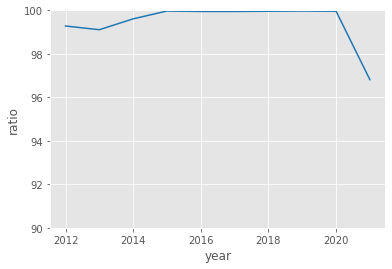

In [470]:
sns.lineplot(data = narcotics_arrest_ratio, x = 'year', y = 'ratio', color = 'tab:blue')
plt.ylim(90,100)
plt.show()

- 체포율은 약 99% 안팎이다.
- 다른 범죄에 비해 압도적으로 체포율이 높고, 최근에는 체포율이 조금 낮아졌다.

# DECEPTIVE PRACTICE
부정경쟁, 기만적 거래

A deceptive trade practice is activity by an individual or business that is meant to mislead or lure the public into purchasing a product or service. False advertising and odometer tampering are two of the most blatant examples of commercial fraud.

In [472]:
df_deceptivePractice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162246 entries, 0 to 2670251
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   unique_key            162246 non-null  int64              
 1   date                  162246 non-null  datetime64[ns, UTC]
 2   primary_type          162246 non-null  object             
 3   location_description  162246 non-null  object             
 4   arrest                162246 non-null  bool               
 5   domestic              162246 non-null  bool               
 6   beat                  162246 non-null  int64              
 7   community_area        162246 non-null  float64            
 8   month                 162246 non-null  object             
 9   year                  162246 non-null  object             
 10  only_month            162246 non-null  object             
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int

## 기간별 발생 수

In [473]:
df_deceptivePractice['year'].value_counts().reset_index().sort_values(by = 'index')

,index,year
9,2012,13475
8,2013,13590
7,2014,15496
5,2015,15654
2,2016,17837
1,2017,18136
0,2018,18453
3,2019,17478
4,2020,16561
6,2021,15566


In [474]:
df_deceptivePractice['year'].value_counts() / 13475 *100

2018    136.942486
2017    134.589981
2016    132.371058
2019    129.706865
2020    122.901670
2015    116.170686
2021    115.517625
2014    114.998145
2013    100.853432
2012    100.000000
Name: year, dtype: float64

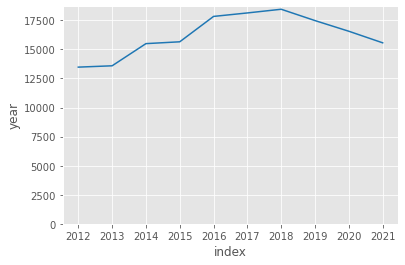

In [478]:
sns.lineplot(data = df_deceptivePractice['year'].value_counts().reset_index().sort_values(by = 'index'), x = 'index', y = 'year', color = 'tab:blue')
plt.ylim(bottom = 0)
plt.show()

- 다른 범죄와는 다르게 우상향인 편
- 2021년 발생 건수는 2012년 발생 건수의 약 115%

## 가장 많이 일어난 장소(location_description)

In [219]:
df_deceptivePractice['location_description'].value_counts().head(10)

RESIDENCE                         56340
APARTMENT                         21022
OTHER                             15437
STREET                             7934
BANK                               6465
RESTAURANT                         6310
SMALL RETAIL STORE                 4656
DEPARTMENT STORE                   4081
ATM (AUTOMATIC TELLER MACHINE)     3576
CTA PLATFORM                       3347
Name: location_description, dtype: int64

In [479]:
df_deceptivePractice['location_description'].value_counts().head(10) / 162246 *100

RESIDENCE                         34.725047
APARTMENT                         12.956868
OTHER                              9.514564
STREET                             4.890105
BANK                               3.984690
RESTAURANT                         3.889156
SMALL RETAIL STORE                 2.869716
DEPARTMENT STORE                   2.515316
ATM (AUTOMATIC TELLER MACHINE)     2.204061
CTA PLATFORM                       2.062917
Name: location_description, dtype: float64

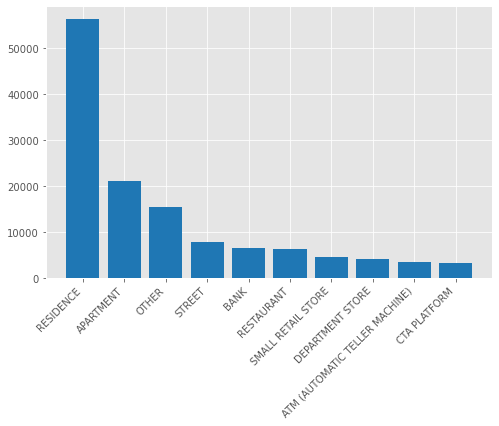

In [544]:
plt.figure(figsize = (8,5))
plt.bar(data = df_deceptivePractice['location_description'].value_counts().head(10).reset_index(), x = 'index', height = 'location_description', color = 'tab:blue')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

- 부당거래는 거주지에서 가장 많이 일어난다. 전체의 약 35%
- 주택, 아파트 중심으로 약 50% 가까이 일어났다.

## 가장 많이 일어난 구역 (community_area)

In [220]:
df_deceptivePractice['community_area'].value_counts().head(10)

8.0     13460
32.0    11280
25.0     6882
28.0     6455
6.0      5932
24.0     4448
43.0     3955
7.0      3836
44.0     3569
71.0     3493
Name: community_area, dtype: int64

In [545]:
df_deceptivePractice_commu = df_deceptivePractice['community_area'].value_counts().head(10).reset_index()
df_deceptivePractice_commu

,index,community_area
0,8.0,13460
1,32.0,11280
2,25.0,6882
3,28.0,6455
4,6.0,5932
5,24.0,4448
6,43.0,3955
7,7.0,3836
8,44.0,3569
9,71.0,3493


In [546]:
df_deceptivePractice_commu['index'] = df_deceptivePractice_commu['index'].astype('int32')
df_deceptivePractice_commu['index'] = df_deceptivePractice_commu['index'].astype('str')

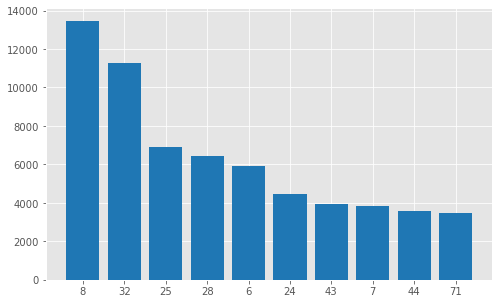

In [547]:
plt.figure(figsize = (8,5))
plt.bar(data = df_deceptivePractice_commu, x = 'index', height = 'community_area', color = 'tab:blue')
plt.show()

## 관할 지구대

In [480]:
df_deceptivePractice['beat'].value_counts().head(10)

1834    3911
122     2681
112     2349
111     2153
1831    2148
1833    2116
123     1915
1832    1807
1824    1517
1925    1270
Name: beat, dtype: int64

In [548]:
df_deceptivePractice_beat = df_deceptivePractice['beat'].value_counts().head(10).reset_index()
df_deceptivePractice_beat

,index,beat
0,1834,3911
1,122,2681
2,112,2349
3,111,2153
4,1831,2148
5,1833,2116
6,123,1915
7,1832,1807
8,1824,1517
9,1925,1270


In [549]:
df_deceptivePractice_beat['index'] = df_deceptivePractice_beat['index'].astype('str')

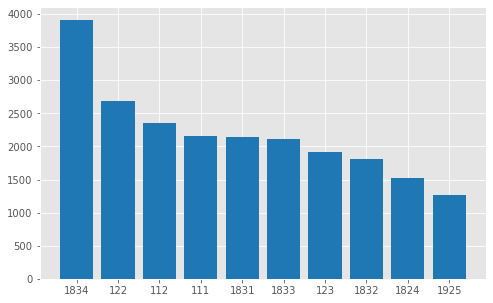

In [550]:
plt.figure(figsize = (8,5))
plt.bar(data = df_deceptivePractice_beat, x = 'index', height = 'beat', color = 'tab:blue')
plt.show()

- 왜 계속 비슷한 지역에서 범죄가 일어나나요 ㅠ


## 체포 여부 (arrest)

In [481]:
df_deceptivePractice['arrest'].value_counts().head(10) / 162246 *100

False    92.441108
True      7.558892
Name: arrest, dtype: float64

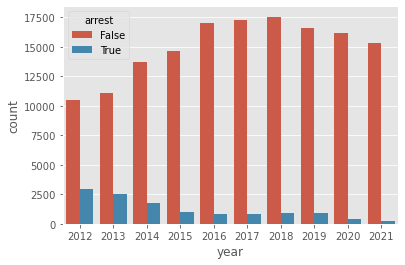

In [222]:
sns.countplot(data = df_deceptivePractice, x = 'year', hue = 'arrest')
plt.show()

In [482]:
df_deceptivePractice_arrest = pd.DataFrame(df_deceptivePractice.groupby('year')['arrest'].value_counts())
df_deceptivePractice_arrest.columns = ['count']
df_deceptivePractice_arrest = df_deceptivePractice_arrest.reset_index()
df_deceptivePractice_arrest

,year,arrest,count
0,2012,False,10506
1,2012,True,2969
2,2013,False,11077
3,2013,True,2513
4,2014,False,13726
5,2014,True,1770
6,2015,False,14638
7,2015,True,1016
8,2016,False,17012
9,2016,True,825


In [483]:
df_deceptivePractice_arrest['year'] = df_deceptivePractice_arrest['year'].astype('int32')
df_deceptivePractice_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20 non-null     int32
 1   arrest  20 non-null     bool 
 2   count   20 non-null     int64
dtypes: bool(1), int32(1), int64(1)
memory usage: 388.0 bytes


In [484]:
deceptivePractice_arrest_ratio = pd.DataFrame(columns = ['year', 'ratio'])
deceptivePractice_arrest_ratio

,year,ratio


In [485]:
arrest_ratio(2012, df_deceptivePractice_arrest, deceptivePractice_arrest_ratio)
deceptivePractice_arrest_ratio

,year,ratio
0,2012.0,22.03
1,2013.0,18.49
2,2014.0,11.42
3,2015.0,6.49
4,2016.0,4.63
5,2017.0,4.63
6,2018.0,4.81
7,2019.0,5.02
8,2020.0,2.22
9,2021.0,1.28


In [487]:
deceptivePractice_arrest_ratio.describe()

,year,ratio
count,10.00000,10.000000
mean,2016.50000,8.102000
std,3.02765,7.000719
min,2012.00000,1.280000
25%,2014.25000,4.630000
50%,2016.50000,4.915000
75%,2018.75000,10.187500
max,2021.00000,22.030000


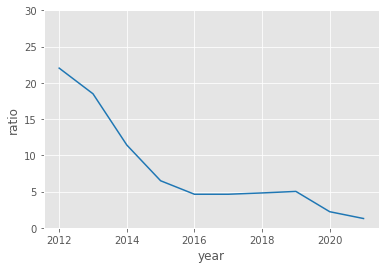

In [486]:
sns.lineplot(data = deceptivePractice_arrest_ratio, x = 'year', y = 'ratio', color = 'tab:blue')
plt.ylim(0,30)
plt.show()

- 체포율이 최근 10년간 평균 약 8%로 낮다. 우하향을 그린다.
- 2013~15년 사이 체포율이 급감하면서 나아지지 않고 있다.